In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("larsen0966/penguins")

print("Path to dataset files:", path)

c:\Users\Remaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.78k/3.78k [00:00<00:00, 556kB/s]

Extracting files...
Path to dataset files: C:\Users\Remaa\.cache\kagglehub\datasets\larsen0966\penguins\versions\1


In [5]:
import os
import pandas as pd
import kagglehub

# 1. Download
path = kagglehub.dataset_download("larsen0966/penguins")

# 2. Find CSV
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
df_penguins = pd.read_csv(os.path.join(path, csv_file))

print(df_penguins.info())
print(df_penguins.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None
   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen

In [6]:
# Quick Cleaning
df_penguins.dropna(inplace=True)

# Encode categorical data
df_penguins['sex'] = df_penguins['sex'].astype('category').cat.codes
df_penguins['island'] = df_penguins['island'].astype('category').cat.codes

# Define X and y
X = df_penguins.drop('species', axis=1)
y = df_penguins['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Use Logistic for Classification
from sklearn.metrics import accuracy_score

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"Logistic Regression Accuracy: {lr_acc * 100:.2f}%")

Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%


is it overftting ?

C:\Users\Remaa\AppData\Local\Temp\ipykernel_3860\2110881509.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='mako')


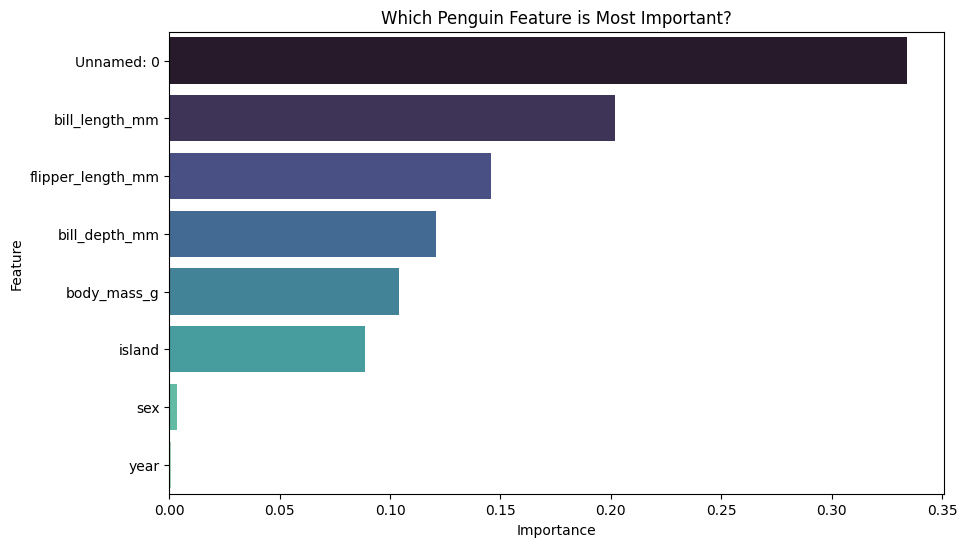

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get importance from your trained Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Sort them
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='mako')
plt.title('Which Penguin Feature is Most Important?')
plt.show()

In [10]:

simple_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
simple_rf.fit(X_train, y_train)
print(f"Simple Model Accuracy: {simple_rf.score(X_test, y_test)*100:.2f}%")

Simple Model Accuracy: 98.51%


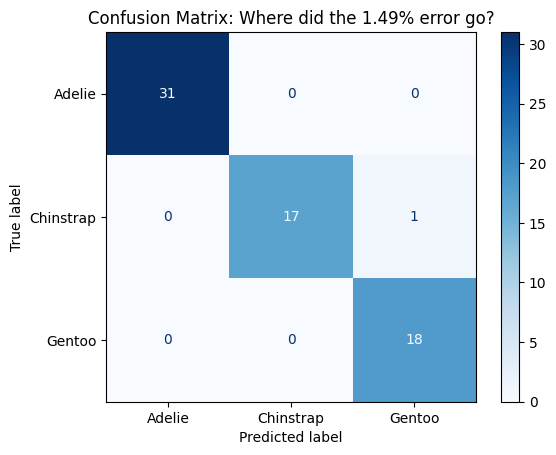

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, simple_rf.predict(X_test))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Where did the 1.49% error go?')
plt.show()